In [1]:
#importing libraries
import pandas as pd
import numpy as np

In [2]:
#dataset
data=pd.read_csv('SMSSpamCollection', sep='\t', names = ['Label', 'Message'])

In [3]:
data

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
data.describe()

,Label,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
data.isnull().sum()

Label      0
Message    0
dtype: int64

In [7]:
data['Label']=data['Label'].map({'ham': 0,'spam': 1})

In [8]:
data.head()

,Label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Count')

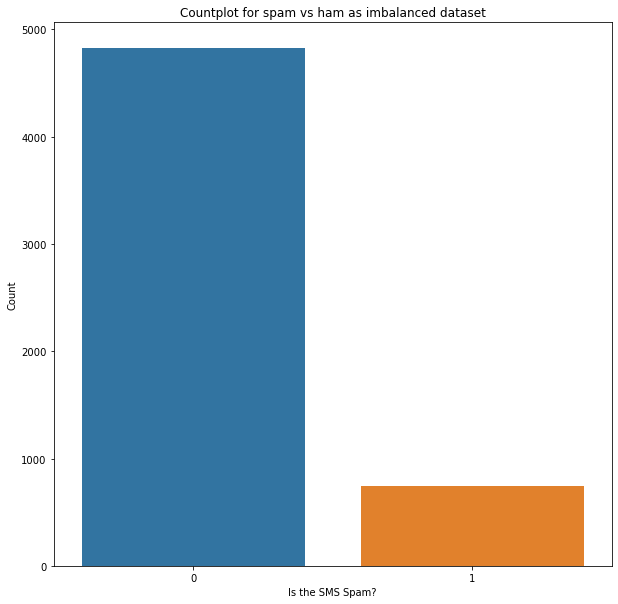

In [10]:
#spam vs ham
plt.figure(figsize=(10,10))
sns.countplot(x='Label',data=data)
plt.title('Countplot for spam vs ham as imbalanced dataset')
plt.xlabel('Is the SMS Spam?')
plt.ylabel('Count')

In [11]:
#handle the dataset using oversampling
only_spam = data[data['Label']==1]

In [12]:
only_spam

,Label,Message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [13]:
print("No. of spam messages: ",len(only_spam))
print("No. of ham messages: ",len(data)-len(only_spam))

No. of spam messages:  747
No. of ham messages:  4825


In [14]:
count = int((data.shape[0]-only_spam.shape[0])/only_spam.shape[0])

In [15]:
count

6

In [16]:
for i in range(0,count-1):
    data=pd.concat([data,only_spam])

In [17]:
data.shape

(9307, 2)

Text(0, 0.5, 'Count')

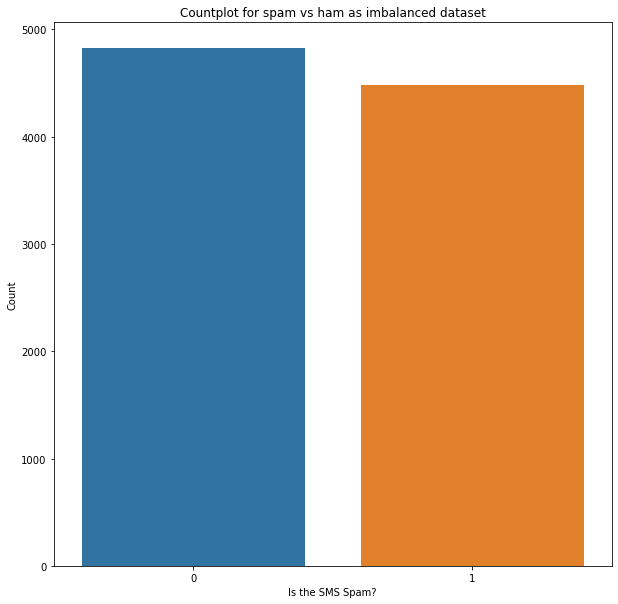

In [18]:
#spam vs ham
plt.figure(figsize=(10,10))
sns.countplot(x='Label',data=data)
plt.title('Countplot for spam vs ham as imbalanced dataset')
plt.xlabel('Is the SMS Spam?')
plt.ylabel('Count')

In [19]:
#creating new feature
data['word_count']=data['Message'].apply(lambda x: len(x.split()))

In [20]:
data

,Label,Message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


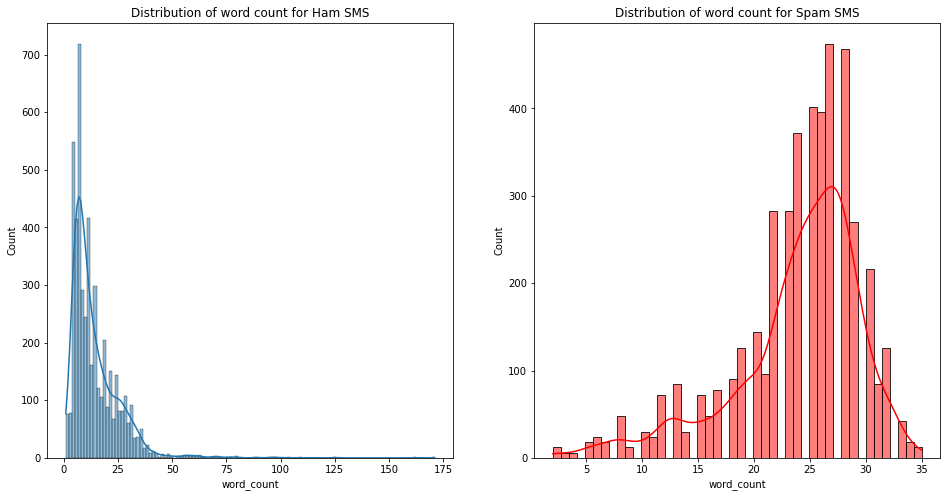

In [21]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.histplot(data[data['Label']==0].word_count, kde=True)
plt.title('Distribution of word count for Ham SMS')
plt.subplot(1,2,2)
sns.histplot(data[data['Label']==1].word_count,color='red', kde=True)
plt.title('Distribution of word count for Spam SMS')
plt.show()

In [22]:
def currency_present(data):
    currency_symbols= ['$', '€', '£', '¥', '₹']
    for i in currency_symbols:
        if i in data:
            return 1
    return 0

In [23]:
data['contain_currency_symbol']=data['Message'].apply(currency_present)

In [24]:
data

,Label,Message,word_count,contain_currency_symbol
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


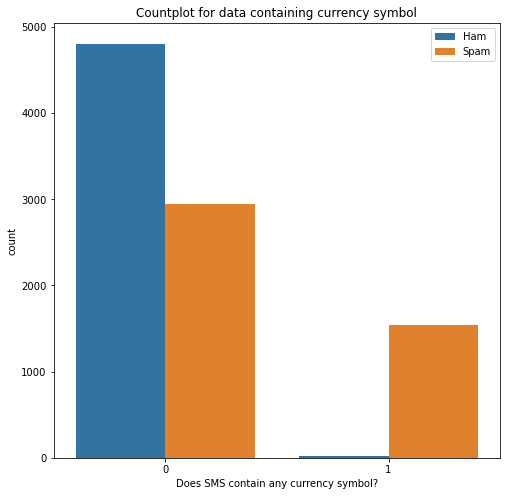

In [25]:
#countplot
plt.figure(figsize=(8,8))
sns.countplot(x='contain_currency_symbol',data=data, hue='Label')
plt.title('Countplot for data containing currency symbol')
plt.xlabel('Does SMS contain any currency symbol?')
plt.ylabel('count')
plt.legend(labels=['Ham', 'Spam'])

In [26]:
#creating new feature for numbers
def number(data):
    for i in data:
        if ord(i)>=48 and ord(i)<=57:
            return 1
    return 0

In [27]:
data['contain_number']=data['Message'].apply(number)

In [28]:
data

,Label,Message,word_count,contain_currency_symbol,contain_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1


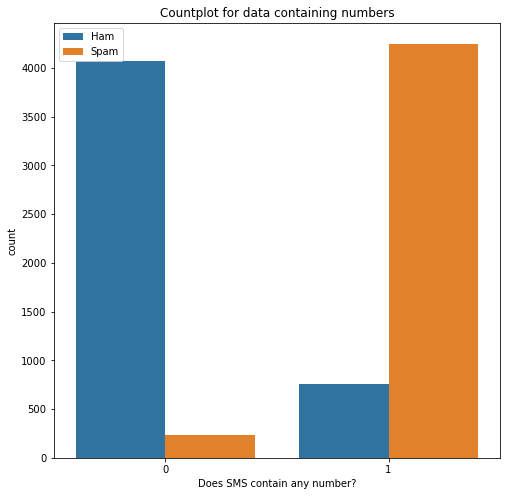

In [29]:
#countplot
plt.figure(figsize=(8,8))
sns.countplot(x='contain_number',data=data, hue='Label')
plt.title('Countplot for data containing numbers')
plt.xlabel('Does SMS contain any number?')
plt.ylabel('count')
plt.legend(labels=['Ham', 'Spam'])

In [30]:
#data cleaning
import nltk
import re
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Chanakya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
corpus=[]
wnl = WordNetLemmatizer()
for sms in list(data.Message):
    #FILTERING OUT SPECIALCHARACTERS AND NUMBERS
    Message = re.sub(pattern='[^a-zA-Z]',repl= ' ', string=sms)
    Message = Message.lower()
    words = Message.split()
    filter_words = [word for word in words if word not in set(stopwords.words('english'))]
    lemm_words = [wnl.lemmatize(word) for word in filter_words]
    Message = ' '.join(lemm_words)
    
    corpus.append(Message)

In [32]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [33]:
#create bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names()

In [34]:
x=pd.DataFrame(vectors, columns = feature_names)
y=data['Label']

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=40)

In [37]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
cv = cross_val_score(mnb, x, y, scoring='f1', cv=10)
print(round(cv.mean(),3))
print(round(cv.std(),3))

0.943
0.004


In [38]:
mnb.fit(x_train, y_train)
y_pred = mnb.predict(x_test)

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1455
           1       0.95      0.94      0.94      1338

    accuracy                           0.95      2793
   macro avg       0.95      0.95      0.95      2793
weighted avg       0.95      0.95      0.95      2793



In [40]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1390,   65],
       [  83, 1255]], dtype=int64)

Text(51.0, 0.5, 'Predicted Values')

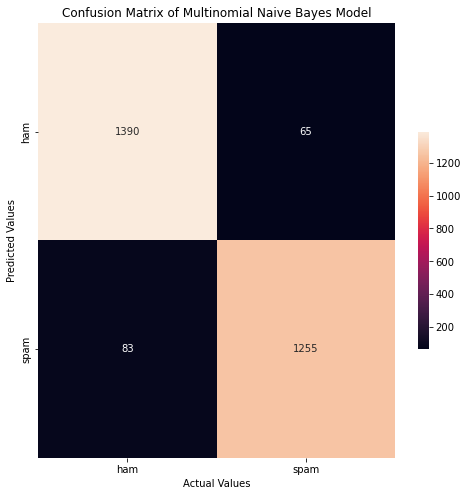

In [41]:
plt.figure(figsize=(8,8))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, xticklabels=axis_labels, yticklabels=axis_labels, annot = True, fmt= 'g', cbar_kws={'shrink':0.5})
plt.title('Confusion Matrix of Multinomial Naive Bayes Model')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [42]:
from sklearn.tree import DecisionTreeClassifier 
dt=DecisionTreeClassifier()
cv1 = cross_val_score(dt,x,y,scoring='f1',cv=10)
print(round(cv1.mean(),3))
print(round(cv1.std(),3))

0.98
0.003


In [43]:
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1455
           1       0.96      1.00      0.98      1338

    accuracy                           0.98      2793
   macro avg       0.98      0.98      0.98      2793
weighted avg       0.98      0.98      0.98      2793



In [45]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1402,   53],
       [   5, 1333]], dtype=int64)

Text(51.0, 0.5, 'Predicted Values')

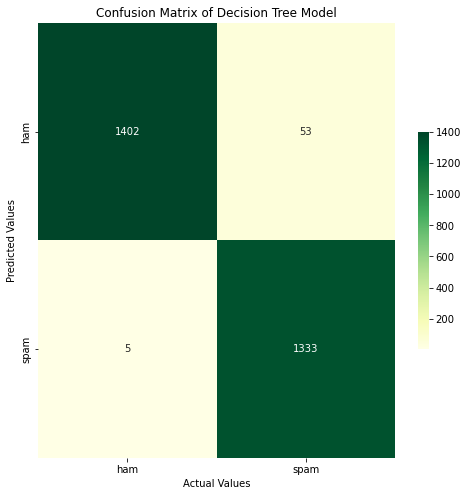

In [46]:
plt.figure(figsize=(8,8))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, xticklabels=axis_labels, yticklabels=axis_labels, annot = True, fmt= 'g', cbar_kws={'shrink':0.5},cmap='YlGn')
plt.title('Confusion Matrix of Decision Tree Model')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [56]:
def sample(sms):
    #FILTERING OUT SPECIALCHARACTERS AND NUMBERS
    Message = re.sub(pattern='[^a-zA-Z]',repl= ' ', string=sms)
    Message = Message.lower()
    words = Message.split()
    filter_words = [word for word in words if word not in set(stopwords.words('english'))]
    lemm_words = [wnl.lemmatize(word) for word in filter_words]
    Message = ' '.join(lemm_words)
    temp=tfidf.transform([Message]).toarray()
    return mnb.predict(temp)

In [57]:
samp_msg='Today is a great day'
if sample(samp_msg):
    print("This is Spam message")
else:
    print('This is Ham message')

This is Ham message


In [58]:
samp_msg='Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question'
if sample(samp_msg):
    print("This is Spam message")
else:
    print('This is Ham message')

This is Spam message
